<a href="https://colab.research.google.com/github/MaliheDahmardeh/World-Development-Indicators/blob/main/WDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The "World Development Indicators" from the World Bank contain over a thousand annual indicators of economic development from hundreds of countries around the world that is from 1960 to 2016. This dataset contains over 1,500 indicators related to various social and economic issues across countries and regions of the world. Some of the indicators related to social policies and issues include:

- Poverty headcount ratio
- Access to improved water sources
- Access to improved sanitation facilities
- Infant mortality rate
- Maternal mortality rate
- Primary completion rate
- Secondary completion rate
- Tertiary completion rate
- Unemployment rate
- Income share held by lowest 20%

There are also indicators related to crime rates and technology issues, such as:

- Homicide rate
- Intentional homicides per 100,000 people
- Mobile cellular subscriptions per 100 people
- Internet users per 100 people

Using this dataset, one could conduct various correlation analyses between population rates and these social and economic indicators.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
from plotly.offline import download_plotlyjs,init_notebook_mode, plot
init_notebook_mode(connected=True)
# cf.go_offline()
import warnings
warnings.filterwarnings('ignore')

#Import DataSet

In [45]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
!mkdir "/content/drive/My Drive/data"

import os
os.listdir('/content/drive/MyDrive/data')

Mounted at /content/drive
mkdir: cannot create directory ‘/content/drive/My Drive/data’: File exists


['Country.csv', 'Indicators.csv']

In [46]:
import pandas as pd

path = '/content/drive/MyDrive/data/Indicators.csv'
df = pd.read_csv(path)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CountryName    object 
 1   CountryCode    object 
 2   IndicatorName  object 
 3   IndicatorCode  object 
 4   Year           int64  
 5   Value          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


In [48]:
df.isnull().sum()

CountryName      0
CountryCode      0
IndicatorName    0
IndicatorCode    0
Year             0
Value            0
dtype: int64

In [61]:
# Check the columns of the dataset
print('Columns:',df.columns)

# Check the shape of the dataset
print('Shape:', df.shape)

# Check the first few rows of the dataset
print('Head:\n', df.head())

# Check the data types of the columns
print('Data types:\n', df.dtypes)

# Check for missing values in the dataset
print('Missing values:\n', df.isnull().sum())

# Check basic statistics of the numerical columns
print('Summary statistics:\n', df.describe())

Columns: Index(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year',
       'Value'],
      dtype='object')
Shape: (5656458, 6)
Head:
   CountryName CountryCode                                      IndicatorName  \
0  Arab World         ARB  Adolescent fertility rate (births per 1,000 wo...   
1  Arab World         ARB  Age dependency ratio (% of working-age populat...   
2  Arab World         ARB  Age dependency ratio, old (% of working-age po...   
3  Arab World         ARB  Age dependency ratio, young (% of working-age ...   
4  Arab World         ARB        Arms exports (SIPRI trend indicator values)   

    IndicatorCode  Year         Value  
0     SP.ADO.TFRT  1960  1.335609e+02  
1     SP.POP.DPND  1960  8.779760e+01  
2  SP.POP.DPND.OL  1960  6.634579e+00  
3  SP.POP.DPND.YG  1960  8.102333e+01  
4  MS.MIL.XPRT.KD  1960  3.000000e+06  
Data types:
 CountryName       object
CountryCode       object
IndicatorName     object
IndicatorCode     object
Year        

In [51]:
# How many unique country codes and indicator names are there ? 
countries = df['CountryCode'].unique().tolist()
indicators = df['IndicatorName'].unique().tolist()
print('How many unique country codes and indicator names are there?')
print('Contries size: %d' % len(countries))
print('Indicators size: %d' % len(indicators))

How many unique country codes and indicator names are there?
Contries size: 247
Indicators size: 1344


In [53]:
# Select two indicators for which you want to compute the correlation
indicator1 = 'SP.DYN.LE00.IN'  # Life expectancy at birth, total (years)
indicator2 = 'NY.GDP.PCAP.CD'  # GDP per capita (current US$)

# Subset the data to include only the relevant indicators
subset = df.loc[df['IndicatorCode'].isin([indicator1, indicator2])]

# Pivot the data to have indicators as columns and countries as rows
subset = subset.drop_duplicates(['CountryCode', 'IndicatorCode'])
pivoted = subset.pivot(index='CountryCode', columns='IndicatorCode', values='Value')

# Compute the correlation between the two indicators
corr = pivoted.corr().loc[indicator1, indicator2]

print(f"The correlation between {indicator1} and {indicator2} is {corr:.2f}")

The correlation between SP.DYN.LE00.IN and NY.GDP.PCAP.CD is 0.30


In this case, a correlation coefficient of 0.30 suggests a weak positive correlation between life expectancy and GDP per capita, but it's important to keep in mind that correlation does not imply causation.

In [58]:
subset = df[df['IndicatorName'].str.contains('poverty|access to improved|completion rate|unemployment|income share')]

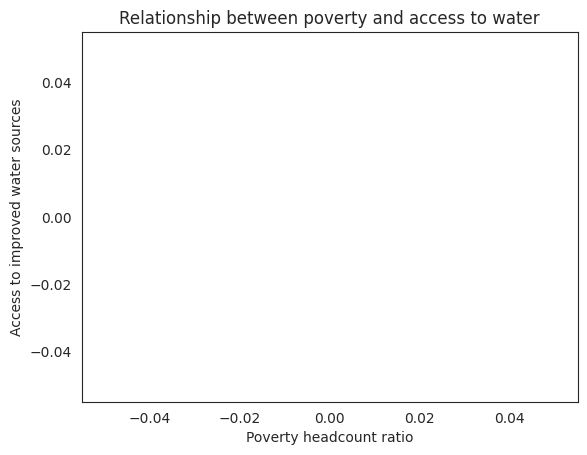

In [59]:
import matplotlib.pyplot as plt
plt.scatter(subset[subset['IndicatorCode']=='SI.POV.DDAY']['Value'], 
            subset[subset['IndicatorCode']=='SH.H2O.SAFE.ZS']['Value'])
plt.xlabel('Poverty headcount ratio')
plt.ylabel('Access to improved water sources')
plt.title('Relationship between poverty and access to water')
plt.show()

In [ ]:
corr = subset[subset['IndicatorCode'].isin(['SI.POV.DDAY', 'SH.H2O.SAFE.ZS'])].pivot(index='CountryCode', columns='IndicatorCode', values='Value').corr().iloc[0,1]
print('Correlation between poverty and access to water:', corr)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(subset.drop(['CountryName', 'CountryCode', 'IndicatorName', 'Year', 'Value'], axis=1), 
                                                    subset[subset['IndicatorCode']=='SI.POV.DDAY']['Value'], 
                                                    test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy:', accuracy)

In [ ]:
subset = df[df['IndicatorName'].str.contains('poverty|access to improved|completion rate|unemployment|income share')]

import matplotlib.pyplot as plt
plt.scatter(subset[subset['IndicatorCode']=='SI.POV.DDAY']['Value'], 
            subset[subset['IndicatorCode']=='SH.H2O.SAFE.ZS']['Value'])
plt.xlabel('Poverty headcount ratio')
plt.ylabel('Access to improved water sources')
plt.title('Relationship between poverty and access to water')
plt.show()

corr = subset[subset['IndicatorCode'].isin(['SI.POV.DDAY', 'SH.H2O.SAFE.ZS'])].pivot(index='CountryCode', columns='IndicatorCode', values='Value').corr().iloc[0,1]
print('Correlation between poverty and access to water:', corr)

In [ ]:
corr = subset[subset['IndicatorCode'].isin(['SI.POV.DDAY', 'SH.STA.SMSS.ZS'])].pivot(index='CountryCode', columns='IndicatorCode', values='Value').corr().iloc[0,1]
print('Correlation between poverty and access to improved sanitation facilities:', corr)

In [ ]:
corr = subset[subset['IndicatorCode'].isin(['SL.UEM.TOTL.ZS', 'SE.PRM.CMPT.ZS'])].pivot(index='CountryCode', columns='IndicatorCode', values='Value').corr().iloc[0,1]
print('Correlation between unemployment rate and completion rate for primary education:', corr)